Name:Dharani Elango

Register Number:212221230021

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

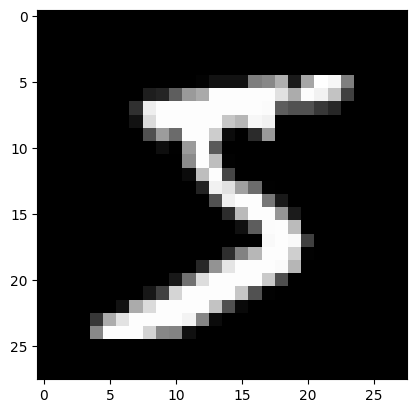

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

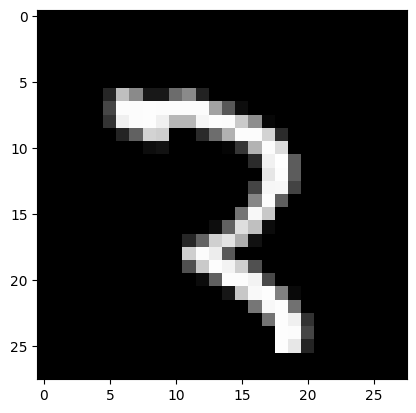

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name:Dharani Elango

Register Number:212221230021

In [124]:
model = keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters =32 , kernel_size =(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [126]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [128]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,batch_size=40, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.0609 - val_accuracy: 0.9798
Epoch 2/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0473 - val_accuracy: 0.9830
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0535 - val_accuracy: 0.9829
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0482 - val_accuracy: 0.9843
Epoch 5/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0517 - val_accuracy: 0.9834
Epoch 6/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0493 - val_accuracy: 0.9862
Epoch 7/10
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0433 -

In [129]:
metrics = pd.DataFrame(model.history.history)

In [130]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.068121,0.979750,0.060882,0.9798
1,0.044552,0.986133,0.047315,0.9830
2,0.031500,0.989800,0.053546,0.9829
3,0.022153,0.993217,0.048242,0.9843
4,0.016773,0.994683,0.051692,0.9834


212221230021 Dharani Elango


<Axes: >

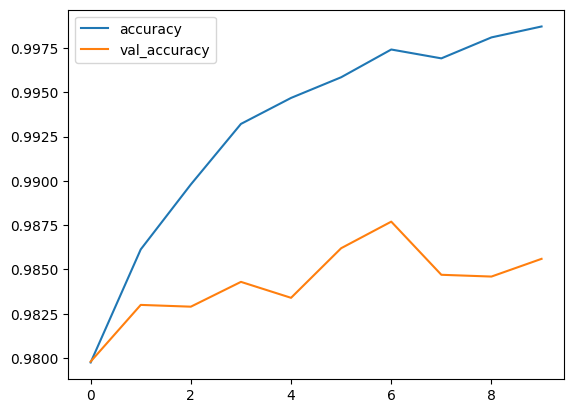

In [147]:
print("212221230021 Dharani Elango")
metrics[['accuracy','val_accuracy']].plot()

212221230021 Dharani Elango


<Axes: >

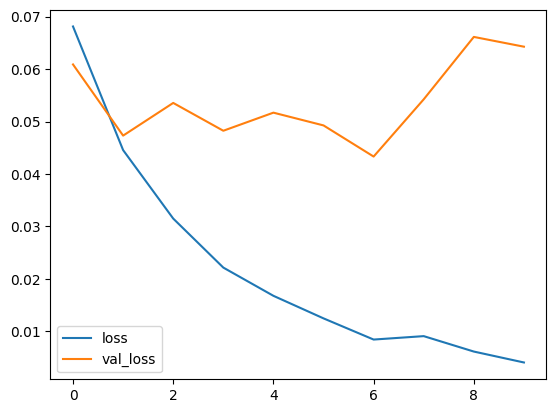

In [148]:
print("212221230021 Dharani Elango")
metrics[['loss','val_loss']].plot()

In [135]:
print("212221230021 Dharani Elango")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

212221230021 Dharani Elango
313/313 [==============================] - 3s 9ms/step


In [136]:
print("212221230021 Dharani Elango")
print(confusion_matrix(y_test,x_test_predictions))

212221230021 Dharani Elango
[[ 972    0    1    1    1    1    1    0    2    1]
 [   0 1130    1    1    1    1    0    0    1    0]
 [   1    2 1014    0    2    0    0    8    3    2]
 [   0    0    0  993    0   11    0    1    2    3]
 [   0    0    0    0  971    0    0    0    1   10]
 [   0    0    0    3    0  888    1    0    0    0]
 [   9    3    0    0    8    9  927    0    2    0]
 [   0    2    4    1    1    0    0 1012    1    7]
 [   2    0    2    2    0    6    0    2  956    4]
 [   0    2    0    1    5    6    0    2    0  993]]


In [137]:
print("212221230021 Dharani Elango")
print(classification_report(y_test,x_test_predictions))

212221230021 Dharani Elango
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.96      1.00      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [138]:
img = image.load_img('/content/four.jpeg')

In [139]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

212221230021 Dharani Elango


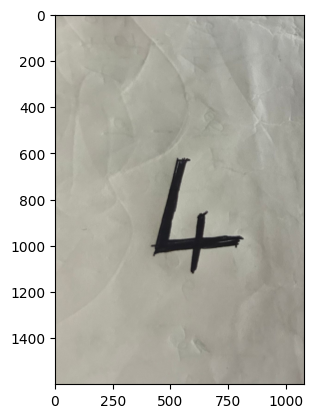

In [151]:
print("212221230021 Dharani Elango")
plt.imshow(img)

In [140]:
img = image.load_img('/content/four.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [141]:
print("212221230021 Dharani Elango")
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

212221230021 Dharani Elango
1/1 [==============================] - 0s 28ms/step


In [142]:
print("212221230021 Dharani Elango")
print(x_single_prediction)

212221230021 Dharani Elango
[3]


212221230021 Dharani Elango


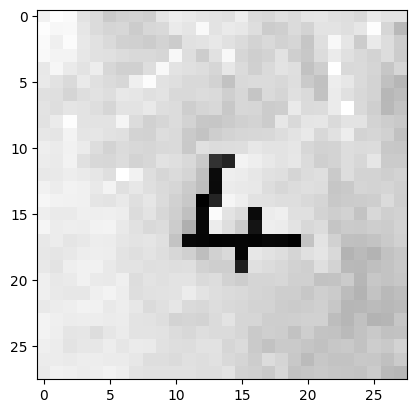

In [143]:
print("212221230021 Dharani Elango")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [144]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [145]:
print("212221230021 Dharani Elango")
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

212221230021 Dharani Elango
1/1 [==============================] - 0s 21ms/step


212221230021 Dharani Elango
[4]
